# S&P500 ML forecasting Model

In [198]:
import sys
sys.path.append('c:/users/joshi/appdata/local/programs/python/python311/lib/site-packages') 

import yfinance as yf

In [199]:
# Instantiate Ticker Class. Enable us to download price history
# ^GSPC --> Refernces S&P 500 Index
sp500 = yf.Ticker('^GSPC')

# Query historical data for maximum period allowed--90+ years.
sp500 = sp500.history(period='max')

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,0.0,0.0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0


In [200]:
# Access row labels. Useful in slicing the data frame
# sp500.index

<Axes: xlabel='Date'>

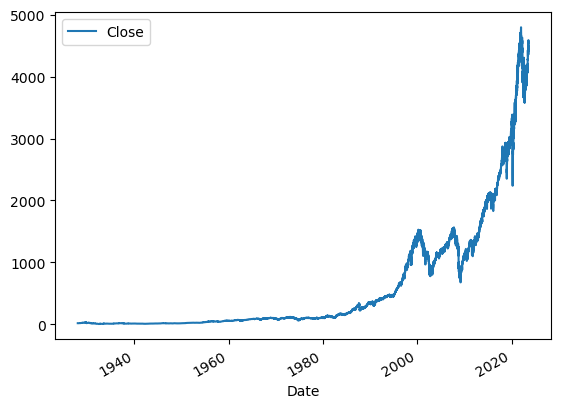

In [201]:
# Plot closing price against the index (row label/historical time stamps)
sp500.plot.line(y = 'Close') 

In [202]:
# Delete specified columns
del sp500['Dividends']
del sp500['Stock Splits']

## Setting Up Target

Target - Will the price go up or down tomorrow? 

In [203]:
# Set up new column Tomorrow. It is tomorrow's closing price.
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863


In [204]:
# Returns boolean (as integer) depending on if Tomorrow's closing price is higher or lower
sp500["Target"] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863,0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0


<Axes: xlabel='Date'>

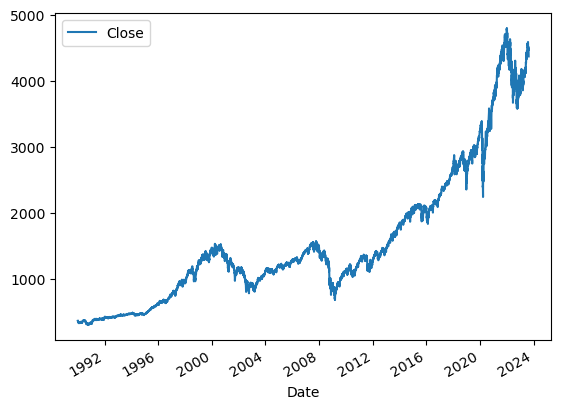

In [205]:
'''
We Limit ourselves to data only from 1990 onwards. This is primarily for two reasons. First, 30+ 
years of data is sufficient to develop our model. Second, older data (some an entire century old) 
may not relate to well to the current market.
'''
# .loc --> An indexer is used to select rows from the DataFrame based on the label (index) value. 
# In this case, it is selecting rows where the index label is greater than or equal to '1990-01-01'.
# This effectively filters the DataFrame to include only rows with dates from January 1, 1990, and 
# onwards.
# .copy --> Create a new copy of the sp500, preserving the old. This also helps avoid a specific 
# pandas copy warning
sp500 = sp500.loc['1990-01-01':].copy() # .copy helps avoid a specific pandas copy warning
sp500.plot.line(y = 'Close')

## Random Forest Classifier

Random Forest is a popular ensemble learning method used for both classification and regression tasks. It belongs to the family of decision tree-based algorithms and is widely used in machine learning due to its effectiveness and versatility.

How Random Forest works:

    A Random Forest classifier creates multiple decision trees during the training phase and combines their predictions to make the final decision. The steps involved in building a Random Forest classifier are as follows:

1. **Bootstrapping**: Randomly sample the training dataset with replacement (this is known as bootstrapping) to create multiple subsets of the data, known as "bootstrap samples."

2. **Building Decision Trees**: For each bootstrap sample, grow a decision tree using a random subset of features at each node. This introduces randomness and diversity in the decision trees.

3. **Voting/Averaging**: When making predictions, the Random Forest classifier aggregates the predictions of all the individual decision trees. For classification tasks, it uses majority voting, where the class with the most votes becomes the final prediction. For regression tasks, it averages the predictions from all the trees.

Advantages of Random Forest:

1. High Accuracy: Random Forest tends to deliver high accuracy compared to single decision trees, especially when dealing with complex datasets.

2. Robust to Overfitting: It is less prone to overfitting because of the averaging of multiple decision trees, which helps in generalizing well to unseen data.

3. Handling Missing Data and Outliers: Random Forest can handle missing data and outliers without requiring extensive data preprocessing.

4. Variable Importance: Random Forest provides a measure of the importance of each feature, which helps in feature selection and understanding the importance of different 
    features in the model.

5. Parallelization: The training of individual decision trees can be parallelized, making Random Forest scalable and efficient for large datasets.

6. Suitable for High-Dimensional Data: Random Forest can handle datasets with a large number of features without feature scaling, making it suitable for high-dimensional 
    data.

Disadvantages of Random Forest:

1. Black Box Model: Like decision trees, Random Forest is also considered a black box model, meaning it is challenging to interpret the underlying logic of the model's decision-making process.

2. Memory and Computational Overhead: Building multiple decision trees can require significant computational resources and memory, especially for large forests or datasets.

3. Training Time: While Random Forest can be parallelized, the training time can still be longer compared to simpler algorithms like logistic regression or naive Bayes.

4. Less Effective for Noisy Data: In the presence of noisy features, Random Forest can struggle to achieve optimal accuracy as it tends to overfit to noise.

5. Bias towards Features with More Levels: Random Forest may have a bias towards features with more levels because such features tend to be selected more often for splitting, potentially affecting the feature importance estimation.

### An aside on Min-Samples-Split

min_samples_split is a parameter used in decision tree-based algorithms, such as Random Forest, to control how a decision tree is built. Specifically, it specifies the minimum number of samples (data points) required in a node of the tree to consider splitting it further into child nodes.

Simply put, min_samples_split determines the minimum number of data points that a node must have to be eligible for further splitting. If a node has fewer samples than the specified value, it will not be split anymore, and it will become a leaf node, effectively ending the tree's growth at that point.

For example, if min_samples_split is set to 5, and a node in the decision tree has only 4 samples, it will not be split, and the tree will not grow any deeper from that point onward.

Setting a higher value for min_samples_split can help control the complexity of the decision tree and prevent overfitting. Overfitting occurs when a decision tree becomes too deep and captures noise or random variations in the training data, leading to poor generalization on unseen data. By limiting the minimum number of samples required for a split, the decision tree is more likely to capture the essential patterns and relationships in the data, leading to better performance on new, unseen data.

On the other hand, setting min_samples_split to a lower value allows the tree to potentially capture more detailed patterns and can result in a more complex model. This might be useful when dealing with a large dataset with sufficient samples in each node to support further splits.


In [206]:
from sklearn.ensemble import RandomForestClassifier


# Initialize a Random Forest Classifier Model
# n_estimators --> # of individual decision trees
# min_samples_split --> Modulates how decision trees are split (see aside above for more details)
# random_state=1 --> Ensures that models results are consistent over different iterations. Thus effects 
# of changes in model cannot to attributed to merely randomness
model = RandomForestClassifier(n_estimators = 100, min_samples_split=100, random_state=1)

# SPLITTING DATA in training and test set
# .iloc --> provides a way to access data using integer-based indexing rather than label-based 
# indexing (which is used with the .loc method).
train = sp500.iloc[:-100]
test = sp500.iloc[-100:] # Test only on the last 100 values

# Specify variables USED to make predictions
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

# Initiate model run.
# .fit --> Takes the input features (predictors) and the labeled (target) data to train model.
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=150, random_state=1)

In [207]:
# Measure ACCURACY of model
import pandas as pd
from sklearn.metrics import precision_score

# Generate predictions for test data
preds = model.predict(test[predictors])

# Set and display predictions as pandas series
preds = pd.Series(preds, index=test.index)

In [208]:
'''
The precision_score function from the sklearn.metrics module is used to calculate the precision of a classification 
model's predictions. Precision is a metric that assesses the accuracy of the positive predictions made by a classifier. 
It is particularly useful when the cost of false positives (incorrectly predicting a positive class) is high.
'''
precision_score(test['Target'], preds)

0.5555555555555556

As of this models last run, the precision score comes out to be 0.556. This means our model (at least on the test data) is able to predict the positive classification--i.e the days when the stock market will go up the next day--with around a 55.6% accuracy. Note that if one were invest blindly for 1000 days, the price will go up 534 days (53.4%) and down 466 days (46.6%). Our model does slightly better than SP500's base value. If one were to follow our model they would be right 555 days.

Precision, for reference, is given by:

$Precision = \frac{True Positive}{True Positive + False Positive}$

**This score is fundamentally useful. You must backtest to get an accurate gauge of your model capabilities.**


<Axes: xlabel='Date'>

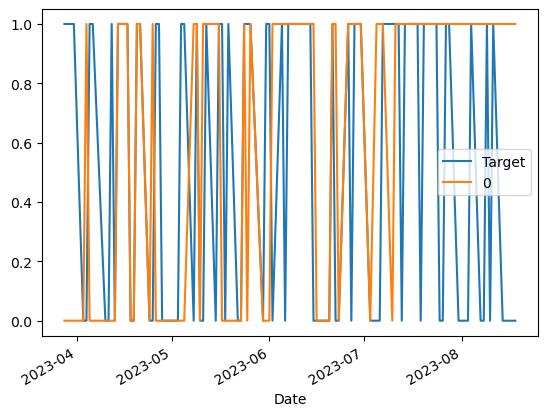

In [209]:
# Plot Prediction with Real results
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

## Building Backtesting System

In [210]:
# Define predict function for ease of use
def predict(train, test, predictors, model):
    
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [211]:
# start = 2500 --> Outlines the amount of data to be used to TRAIN model. Since a trading year has 250 
# days, we want to train on 2500 days of trading data
# step = 250 --> Train a model for 250 data points (~1 year) and then move to the next year, until 2022

'''
General Strategy: Take value for the first 10 years of data, and predict the values for the 11th year.
Then take the values for the first 11 years and predict the value of the 12th year.
'''
def backtest(data, model, predictors, start=2500, step=250):
    # A list of Data Frames. Stores predictions for a single year
    all_predictions = []
    
    # Iterate through years
    # data.shape[0] --> Returns the number of rows in Data Frame
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [212]:
predictions = backtest(sp500, model, predictors)

In [213]:
predictions["Predictions"].value_counts()

0    3411
1    2562
Name: Predictions, dtype: int64

In [214]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5284933645589384

In [215]:
predictions['Target'].value_counts() / predictions.shape[0]

1    0.533568
0    0.466432
Name: Target, dtype: float64

Our model performs worse that a diligent and non-strategic investor who wakes up everyday and buys the S&P 500 stock. This is fine. After backtesting we can be confident in our future models since it would have been tested on years worth of data in various market condition. We can now be **far** more confident that our model works.

### Adding Additional Predictors to Our Model

In [216]:
# Create a variety of rolling averages. (See comment below)

'''
Rolling averages, also known as moving averages, are a statistical technique used to smooth out 
fluctuations in time series data and highlight underlying trends or patterns. They provide a moving, 
average value by taking the average of a fixed number of consecutive data points at each step.
'''

# Compute rolling averages for the last 2, 5, 60, 250 and 1000 trading days
horizons = [2, 5, 60, 250, 1000] 

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    # Ratio between today's close and the average close for the last {horizon} days
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    # Number of days, in the past {horizon} days, the stock price went up
    trend_column = f"Trend_{horizon}"
    # shift(1) --> Shift forward
    # rolling(horizon).sum()["Target"] --> Find sum of rolling avg. of target for the last {horizon} entries
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [217]:
# .dropna --> A method used to remove missing or "NaN" (Not a Number) values from a DataFrame. We get rid
# of 4 years worth of data due to the last entry in horizons--1000.
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-11 00:00:00-04:00,4450.689941,4476.229980,4443.979980,4464.049805,3753290000,4489.720215,1,0.999465,1.0,0.995621,2.0,1.015915,34.0,1.097368,120.0,1.163615,533.0
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863,0,1.002867,1.0,1.002631,2.0,1.020476,34.0,1.103469,120.0,1.169828,534.0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0,0.994191,1.0,0.993780,2.0,1.007773,33.0,1.090581,119.0,1.155837,534.0


## Improving our Model

In [228]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [233]:
# Define predict function for ease of use
def predict(train, test, predictors, model):
    
    model.fit(train[predictors], train['Target'])
    # .predict_proba() --> Returns PROBABILITY that the stock prices will go up or down tomorrow.
    # predictions will NOT just store 0s and 1s
    preds = model.predict_proba(test[predictors])[:,1]
    # We only "bet" when we are sure i.e more than 60% sure
    preds[preds >= 0.60] = 1
    preds[preds < 0.60] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [234]:
predictions = backtest(sp500, model, new_predictors)

In [235]:
predictions['Predictions'].value_counts()

0.0    4153
1.0     819
Name: Predictions, dtype: int64

In [236]:
precision_score(predictions["Target"], predictions['Predictions'])

0.568986568986569